In [67]:
!pip install wordcloud

In [68]:
import pandas as pd

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
df = pd.read_csv("polarity_monkeypox.csv")
df

,Unnamed: 0,Date,Username,Location,Verified,Hashtag,Tweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,0,2022-08-17 23:57:12+00:00,darkcobrabws,NaN,False,NaN,@eastcoastHuman @GovCanHealth You guys are obs...,[],You guys are obsessed with vaccines arent you...,"{'polarity': -0.275, 'subjectivity': 0.5, 'sen...",-0.275000,0.500000,Negative
1,1,2022-08-17 23:46:13+00:00,CMANN66,Winnipeg,False,NaN,@MBGov We need 100% compliance on the Monkey P...,[],We need 100% compliance on the Monkey Pox Vac...,"{'polarity': -0.525, 'subjectivity': 0.5, 'sen...",-0.525000,0.500000,Negative
2,2,2022-08-17 23:31:58+00:00,1215Deb,"Virginia, USA",False,NaN,"@ajwhitewolf So a friend, who is gay, and is h...",[],So a friend who is gay and is hiv positive is...,"{'polarity': 0.14848484848484847, 'subjectivit...",0.148485,0.282197,Positive
3,3,2022-08-17 23:27:07+00:00,marlborhoe666,NWI,False,NaN,Anyone else have insane anxiety about monkey p...,[],Anyone else have insane anxiety about monkey p...,"{'polarity': -0.14486607142857144, 'subjectivi...",-0.144866,0.564286,Negative
4,4,2022-08-17 23:27:01+00:00,RatherBeGulfing,Bunnyville Station,False,NaN,"Where I live now, the monkey pox vaccine is on...",[],Where I live now the monkey pox vaccine is onl...,"{'polarity': 0.19772727272727272, 'subjectivit...",0.197727,0.505556,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33764,33764,2022-04-01 12:59:45+00:00,FrunksChristine,NaN,False,NaN,Reliance on Monkeys for COVID19 Vaccine Experi...,[],Reliance on Monkeys for COVID19 Vaccine Experi...,"{'polarity': -0.5, 'subjectivity': 0.3, 'senti...",-0.500000,0.300000,Negative
33765,33765,2022-04-01 12:33:52+00:00,monkey_leader,"La Canada Flintridge, CA",False,NaN,Fauci should be prepared to have no one listen...,[],Fauci should be prepared to have no one listen...,"{'polarity': 0.55, 'subjectivity': 0.75, 'sent...",0.550000,0.750000,Positive
33766,33766,2022-04-01 12:27:07+00:00,PooBouy,Antarctica,False,NaN,@_lil_woozy_ Does this mean you don’t support ...,[],Does this mean you don’t support them testing...,"{'polarity': -0.3125, 'subjectivity': 0.6875, ...",-0.312500,0.687500,Negative
33767,33767,2022-04-01 05:14:17+00:00,JHolden77262914,Mars Congressional Republic,False,NaN,@Njv251Njv25 @kymburleigh @thehill Even if we ...,[],Even if we give Trump all the credit (which h...,"{'polarity': -0.05, 'subjectivity': 0.0, 'sent...",-0.050000,0.000000,Negative


In [70]:
df1 = df[['clean_tweet','sentiment']]

In [71]:
df1

,clean_tweet,sentiment
0,You guys are obsessed with vaccines arent you...,Negative
1,We need 100% compliance on the Monkey Pox Vac...,Negative
2,So a friend who is gay and is hiv positive is...,Positive
3,Anyone else have insane anxiety about monkey p...,Negative
4,Where I live now the monkey pox vaccine is onl...,Positive
...,...,...
33764,Reliance on Monkeys for COVID19 Vaccine Experi...,Negative
33765,Fauci should be prepared to have no one listen...,Positive
33766,Does this mean you don’t support them testing...,Negative
33767,Even if we give Trump all the credit (which h...,Negative


In [72]:
df1_pos = df1[ df1['sentiment'] == 'Positive']
df1_pos = df1_pos['clean_tweet']

df1_neg = df1[ df1['sentiment'] == 'Negative']
df1_neg = df1_neg['clean_tweet']

df1_neu = df1[ df1['sentiment'] == 'Neutral']
df1_neu = df1_neu['clean_tweet']

In [73]:
df1_pos

2         So a friend who is gay and is hiv positive is...
4        Where I live now the monkey pox vaccine is onl...
5        Wow no wait for my second monkey pox vaccine a...
7        We got our first case of monkey pox and limite...
10       Got flu shot today waiting on next Covid boost...
                               ...                        
33755    Testing these vaccines on monkeys was one of t...
33758    Barbados has monkeys I came across this cute t...
33759    If you think Im trying that many vaccines that...
33765    Fauci should be prepared to have no one listen...
33768     I don’t think we know yet (in published data ...
Name: clean_tweet, Length: 13500, dtype: object

In [86]:
png='twitter.png'
png

'twitter.png'

In [113]:
def wordcloud_draw(data, color = 'black',):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                
                                and  word.find('covid')
                               
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


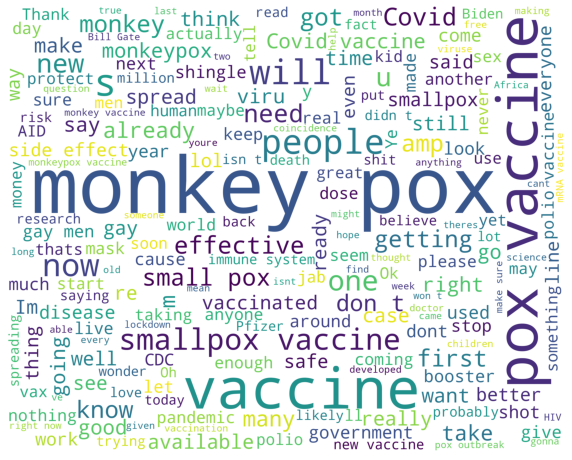

In [114]:
print("Positive words")
wordcloud_draw(df1_pos,'white')

Negative words


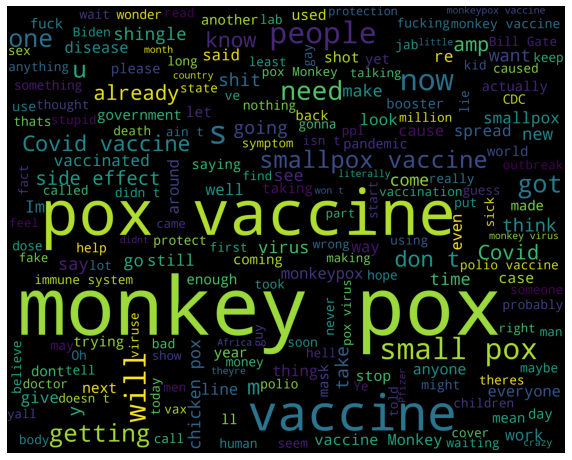

In [115]:
print("Negative words")
wordcloud_draw(df1_neg,'black')

Neutral words


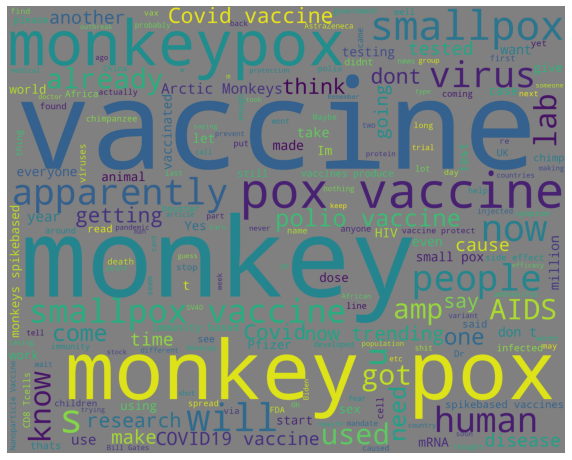

In [116]:
print("Neutral words")
wordcloud_draw(df1_neu, 'grey')